# Probability day 2

What we'll try to go over today:

* Algebra of probability
* Common distributions
* How to apply Bayes theorem for conjugate distribtuions

During you're time as a PhD student it's likely you'll have to model behavior and or neural data. To do this we usually first fall back on tried and true tools. Among these are common probability distributions that we'll go over today, as well as a general framework for inference that we'll start today (but you'll get alot more of this in the modeling lectures).


In this notebook we'll go over many of the same concepts you became aware of in yesterday's lecture, but in a bit of a different fashion. Probability theory, like say, calculus or linear algebra has certain rules for performing manipulations and computations. We want to try and at least make you aware of some of these rules, and hopefully comfortable with them. 

### Note: the comments in the cells of these notebook contain questions and additional information, please use them!

First we need to recall how to interpret something such as $P(X|Y)$

### Q.1 
* What variable is $P(X|Y)$ a function of? 
* What exactly are we considering the probability of here? 
* Which one of these is correct:
    * 1. This is the probability of the random variable X given Y
    * 2. This is the probability of the random variable X, taking into account information from Y

## The product (also called chain) rule of probability

If we are considering the probability of two random variables in tandem we write this down as: $P(A, B)$

In probability theory there is a rule we can apply referred to the product rule, or the chain rule that allows us to rewrite $P(A, B)$ as: 

$$P(A, B) = P(A|B)P(B)$$

in addition we should note that the application of this rule is symmetric in the sense that we could have also written:

$$P(A, B) = P(B|A)P(A)$$

later you'll learn, or as you'll remember, this symmetry allows you to write down conditional probabilities in terms of **likelihoods, priors, and marginals** 

## Q.2

* Write down what the application of the product rule to $P(X, Y)$ gives. (Write this down both ways as above)
* Equate both ways of writing down $P(X, Y)$ after applying the product rule to each other and manipulate the equation such that only one statement of $P(\cdot)$ is on either the left or right side. Do this 3 different ways

## Independence

If two random variables are independent, then when we apply the chain rule, we no longer need to condition: 

$$P(A, B) = P(A)P(B)$$

This is telling us that no matter our choice of $A$, $P(B)$ is unchanged (and vice versa).

Imagine that $A$ is the random variable for the sidewalk being wet. Further imagine that $B$ is the random variable for it raining. Now imagine this is in a strange planet where sidewalks deflect rain back to the sky (but they can still get wet if say, you dropped a tea drink on the sidewalk). This means that the sidewalk being wet is completely independent of it raining, because no matter if it rains, by the magical property of the sidewalk, this will never cause it to get wet. As for the other direction, when the sidewalk deflects the rain back up, the rain then goes to another dimension, and this has the consequence of having no consequence on whether it rains again or not. And so again, the probability of it raining is independent of the sidewalk being wet. 

Why did we need that last clause? Well because if the sidewalk being dry DID have an impact on the probability of it raining, then we could not say that $P(B|A) = P(B)$, because $A$ contains the values {wet, not-wet}, and so $B$ must be indpendent of all values for which $A$ can become.

## All probabilities are conditional probabilities

This is less a point of technicality, rather more on the side of interpretation. It is very much in line with how we should think of $P(A|B)$ as only a function of $A$. Said another way, $P(A|B)$ should hold the same meaning as $P(X)$ in the sense that we are only considering the distribution over one variable, the one to the left of the verticle bar (and when there is only one variable you can imagine there is a verticle bar, with some prior information being conditioned on). 

Keeping this view in mind, then it is easy to apply the chain rule while holding a conditioning set constant: 

$$P(A, B | C) = P(A|B, C)P(B|C)$$


## Q.3

* Write down what $P(X, Y| A, C)$ is aftering using the product rule to expand it as a product of 2 terms (e.g. the answer should be of the form: $P(X, Y| A, C) = P(\cdot)P(\cdot)$

_hint: treat (A, C) = D and rewrite the relation above_

## Manipulation with Bayes rule

Bayes rule tells you how to compute a particular conditional probability, from a different conditional probability, in particular if we want $P(A|B)$ but only have $P(B|A)$ (and a some additional information) we can use Bayes rule to get at the desired quantity. Using: 

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

some things to note, in modeling: 

$P(A)$ is often called the prior

$P(B|A)$ is often called the likelihood 

$P(B)$ is often called the marginal evidence

$P(A|B)$ is called the posterior

## Q.4

* Use Bayes rule to write down $P(Z|Y)$ as a product of the likelihood and prior, divided by the marginal evidence

At the risk of beating a dead horse, let's try to give the different variables in Bayes rule a bit of meaning to help us remember how to apply it in general. 

$P(A|B)$ considers the probability of $A$, after incorporating the information about $B$.

$P(B|A)$ is the current evidence for $B$, taking into acount what we know about some particular aspect of $A$

$P(A)$ is our prior knowledge of some particular aspect of $A$

$P(B)$ is a marginal probability, where we have "marginalized out" $A$, that is, it is $P(B|A)P(A)$ for all possible values of $A$

## More on certain distributions

There are certain distributions that are more common in tasks of estimation or modeling or things related. Almost all of them belong to the exponential family of distributions. You'll recall some of these from yesterday's lecture. 

## A Gaussian (also called Normal) distribution

This is a continuous distribution for real-valued random variables. In additional these can be vector valued (i.e. multivariate) or scalar valued (univariate). The probability density function (PDF) of a Gaussian is:

$$\frac{1}{\sigma \sqrt{2\pi}} exp\Big(-\frac{1}{2} \big( \frac{x - \mu}{\sigma}\big)^2\Big)$$

sometimes, depending on the notation you'll see this abbreviated as: 

$$P(x; \mu, \sigma^2) = Normal(x; \mu, \sigma^2)$$

or equivalently: 

$$P(x| \mu, \sigma^2) = Normal(x| \mu, \sigma^2)$$

where $Normal(\cdot)$ is equal to the function writen out above with the exponential in it. When we "evalute" the above we compute the density of some value $x$, under some fixed values for $\mu$ and $\sigma^2$

In [1]:
# we'll now learn how to do this using the scipy.stats module in python
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this is the mean
mu = 3.4

# this is the variance
sigsquared = 4

# we will evaluate the density by plugging in each value of x below
x = [0.1, 1, 2, 10.4]

# note that the norm object we just imported contains the same function
# that Normal() contains, as written in the markup cell above
# this function is used with the .pdf() call
# two ways you can do this that are equivalent:
wayOne = norm.pdf(x, loc=mu, scale=np.sqrt(sigsquared))

# uncomment these blelow
#print("first way: ", wayOne)

# or you can create the object first:
wayTwo = norm(loc=mu, scale=np.sqrt(sigsquared))
#print("second way: ", wayTwo.pdf(x))

# can you tell us the difference between these two, what does it mean in terms of 
# what variables are available in the scope of your program?

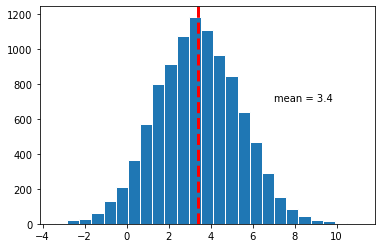

In [5]:
# sampling values from a normal distribution
normDistributed = norm(loc=mu, scale=np.sqrt(sigsquared)).rvs(10000)

# we can visualize these samples with a histogram. With enough samples we start to get an
# idea of what the true form of the distribution is (e.g. we get a sense for the mean and standard deviation)
plt.hist(normDistributed, edgecolor="white", bins=25);
plt.axvline(mu, color="red", linestyle="--", lw=3)
plt.annotate(xy=(7, 700), s=f"mean = {mu}");

The mean, $\mu$, of a Gaussian distribution is sometimes referred to as the "location" parameter. Intuitively you can think of it, in the univariate case, as the point on the real number line that the shape of the distribution is centered on. The standard deviation, $\sigma$ ,(recall that standard deviation is the square root of the variance) is sometimes referred to as the "scale" parameter. It will determine how much values spread out away from the peak.

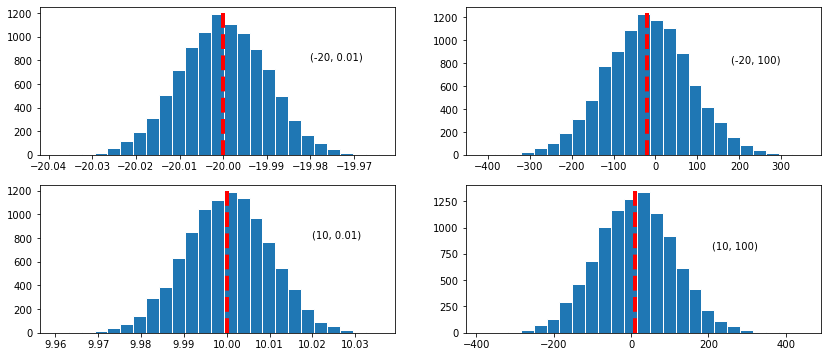

In [3]:
mus = [-20, 10]
sig2s = [0.01, 100]
nvals = 10000

# what happens if we randomly sample values, as above from Gaussian distribution defined by the following: 

params = [(x, y) for x in mus for y in sig2s]
empDists = [norm(*p).rvs(nvals) for p in params]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14, 6))

# plotting each of them to see where their means fall, and how far
# from the mean other values sampled from the same distribution are
for idx, val in enumerate(ax.flatten()):
    val.hist(empDists[idx], edgecolor="white", bins=25)
    val.axvline(params[idx][0], color="red", linestyle="--", lw=4)
    val.annotate(xy=(params[idx][0] + 2*params[idx][1], 800), s=params[idx])

In [10]:
# this is the mean
mu = 3.4

# this is the variance
sigsquared = 4

# we will evaluate the density by plugging in each value of x below
x = [0.1, 1, 2, 10.4]

## Q.5

For the values of the mean and variance written in the code block above, what value in the list $x$ to you expect to have the largest PDF value? For which do you expect the samllest ?

## Q.6

Imagine that you're some animal that needs to find food sources at very particular locations. Perhaps you have, in your mind, approximated the probable locations of food items in terms of Gaussian distributions. Relate the two parameters of the Gaussian discussed above to your approxmations of the food items. If you want to very easily find food, given that you know its location what would that say about one of the parameters?

## A Bernoulli distribution

Unlike the Gaussian, Bernoullis are discrete distributions. Oftentimes you'll see it conceptualized as a coin flip. This is because the Bernoulli can only take on two values: 1 and 0. It takes on the value 1 with some probability: $ 0 \leq p \leq 1$ and the value 0 with probabiilty $1 - p$. If we have a fair coin, this means $p = heads = 0.5$ and $1 - p = tails = 0.5$

Because a Bernoulli is discrete, instead of a probability density function it has a probability mass function. It's form is:

$$p^x(1-p)^{1-x}$$

where above $x$ is a placeholder for the outcome (1 or 0, heads or tails).

## Q.7

What happens to the above function when $x = 0$ ? What about when $x = 1$ ?

A Bernoulli distribution (and infact many distributions if not all) can actually be written down in a different way, note that: 

$$p^x(1 - p)^{1- x} = px + (1-p)(1-x)$$

The different ways of writing down a distribution can be useful for different things. For example, if you're computing some integral with a Bernoulli function involved, then the second way of writing down the Bernoulli might be more helpful. However if you're computing log-probabilities, then the first way might more conveinent.

In [ ]:
from scipy.stats import bernoulli

# create a variable of the bernoulli distribtion with p = 0.3


# use what you've learned above to sample random values from a Bernoulli distribution


# as above, plot the samples of the bernoulli in a histogram (what do you expect to see here?)

## A Binomial distribution

A Binomial distribution is similar to a Bernoulli. We can think of it as a "generalized" Bernoulli because for a certain choice of parameter values of the Binomial, we get a distribution that is equivalent to a Bernoulli with those parameter values. Just like a Bernoulli, a Binomial is a discrete distribution and so its probability mass function has the form:

$$\frac{n!}{x!(n-x)!} p^x(1-p)^{(n-x)}$$

notice that if $n = 1$, the above formula becomes the same as that for a Bernoulli distribution. As we can see a Binomial has two parameters, $n$, this can take on any value in the set of natural numbers (e.g. 0, 1, 2, 3...). and $p$, this is the same as the Bernoulli case, a number between 0 and 1 (or equal to one of those extremes).

A Binomial distribution with parameters $n$ and $p$ is defined as a distribution for a random variable of the number of sucesses in a sequences of $n$ in dependent experiments, each having probability $p$ of sucess. For example, you have a fair coin with $p = 0.5$, telling us that heads and tails are equally likely. If we want to compute the probability mass function of 3 heads in 10 tosses of the coin, then we'd evaluate this function: 

$$P(x|n, p) = Binomial(x|n, p) = \frac{10!}{3!(10 - 3)!} 0.5^3(1 - 0.5)^{10 - 3}$$

In [8]:
# import the binomial distribution from scipy

n = 10 # 10 total tosses
p = 0.3 # probability of success

# randomly sample form a Binomial with these parameters

# What do you expect this plot to look like?

# plot the resulting samples with plt.hist()

## A Beta distribution

A Beta distribution is often called "a distribution over probabilities", this is because if we sample values from a Beta distribution they will always be between 0 and 1, just like probabilities. A Beta distribution is a continuous distribution 

## Q.8
Why is a Beta distribution a continuous distribution?

This family of distributions is defined by the two parameters: $\alpha$, $\beta$ and the function of the form: 

$$P(p; \alpha, \beta) = Beta(p; \alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} p^{\alpha - 1}(1-p)^{\beta -1 }$$

Here $0 \leq p \leq 1$. The parameters $\alpha$ and $\beta$ are called shape parameters because they control the shape of the density as you vary them. Lets see this below:

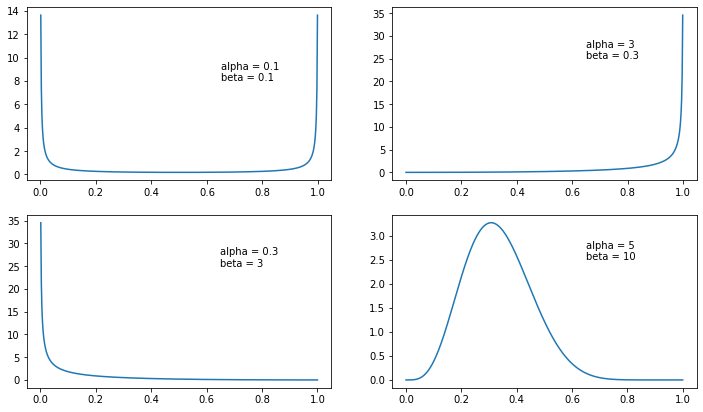

In [9]:
from scipy.stats import beta
alpha_beta = [(0.1, 0.1), (3, 0.3), (0.3, 3), (5, 10)]
betaDists = [beta(*ab) for ab in alpha_beta]
yannots = [8, 25, 25, 2.5]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (12, 7))
x_axis = np.linspace(start=0, stop=1, num=500)

for idx, obj in enumerate(ax.flatten()):
    alpha, beta = alpha_beta[idx]
    obj.plot(x_axis, betaDists[idx].pdf(x_axis))
    obj.annotate(xy=(0.65, yannots[idx]), s=f"alpha = {alpha}\nbeta = {beta}")

In [ ]:
# use what you've done above to do a few things:

# 1. import the Beta distribution from scipy

# 2. evaluate the density function for any value of p

# 3. sample values from the function, after assinging any values of alpha and beta you'd like
# there are some restrictions on alpha and beta, what are they?

## Using Bayes theorem to infer the probability of a biased coin

Here's the scenario, we have a biased coin that comes up heads roughly 46 % of the time and tails the rest. We're going to use the knowledge of some of the distributions we just learned about to try and figure out this bias, using random samples of data. To do this we'll use Bayes rule, as it will tell us exactly how to do it. 

If we want to write down this task in the usual notation we have to define some terms:

$h = heads$ = head bias

$t = tails$ = tail bias

$b = belief$ = prior belief of heads

$d = data$ = set of data points

$$P(belief|data) = \frac{P(data|belief)P(belief)}{\int P(data|belief)P(belief) \mathop{d belief}}$$

and more compactly as:

$$P(b|d) = \frac{P(d|b)P(b)}{\int P(d|b)P(b) \mathop{d b}}$$


let's step through this one data sample at a time:

We have some prior belief for the bias of the coin, this prior belief is encoded in a Beta distribution (because we say we believe the coin will come up heads some % of the time and that % must be between 0 and 1). this distribution has the form: 

$$P(b) = P(b| \alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} b^{\alpha - 1}(1-b)^{\beta -1 }$$

Then we get a data point, we toss the coin. As we learned above the distribution of a coin is a Bernoulli so we can also write: 

$$P(d|b) = b^d(1-b)^{(1-d)}$$


Now just as we see in Bayes theorem, these two terms are being multiplied. So we can do the same:

$$\Big( b^d(1-b)^{(1-d)} \Big) \Big(\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} b^{\alpha - 1}(1-b)^{\beta -1 }\Big)$$

OK, so now we have to mention that using Beta and Bernoulli distributions in this fashion is actually a special case where Bayes rule works out nicely enough to be done with pure algebra. Usually, we can't do what we are about to do because the functions of the different terms don't have the same form as they do above. Notice:

$P(d|b)$ has $b^d$, and $P(b)$ has $b^{\alpha-1}$ that means (by the rules of exponents): 

$$b^d \times b^{\alpha-1} = b^{d + \alpha - 1}$$

and again: $P(d|b)$ has $(1-b)^{1-d}$ and $P(b)$ has $(1 - b)^{\beta - 1}$ , so:

$$(1-b)^{1-d} \times (1 - b)^{\beta - 1} = (1 - b)^{1-d + \beta - 1}$$

if we combine these steps we get 

$$b^{d + \alpha- 1}(1-b)^{1 - d + \beta - 1}$$

again, please notice that in $d + \alpha - 1$, this is exactly  $\alpha - 1$ in the original case, if we define: $\alpha' = d + \alpha$, then we have $b^{\alpha' - 1}$

and in $1 - d + \beta -1$, we can define: $\beta' = 1 - d + \beta$, so  we have again the original form of $(1-b)^{\beta' - 1}$

at this point we can see that this result is exactly a Beta distribtuion of the form: 

$$P(b|d) =  \frac{\Gamma(\alpha')\Gamma(\beta')}{\Gamma(\alpha' + \beta')} b^{\alpha' - 1}(1-b)^{\beta' -1 }$$

the above suggests something, and that's basically that we only need to keep track of $\alpha'$ and $\beta'$, as new data come in. So long as we keep track of this, we can plug these new paramters into the form of a Beta distribution. So how do we keep track of this? Well as we just saw:

* We add the new sample to the previous $\alpha$
* We add 1 minus the new sample to the preveious $\beta$

OK, thats great and all, but what was the task? It was to infer the bias of the coin. However what we've arrived at is how to get to the function of the posterior distribution for that bias. What if I said, just give me one number, of what that you think that bias might be after observing all the data. What would be the correct thing to give me? One obvious answer is, it's the number between 0 and 1 for which our $P(b|d)$ function gives the highest output. And it turns out that this number will be: 

$$b = \frac{\alpha'}{\alpha' + \beta'}$$

Text(0.65, 6, 'true head bias= 0.46\nestimated head bias = 0.411')

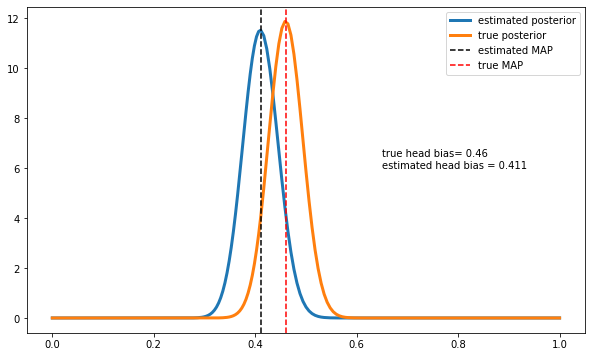

In [ ]:
np.random.seed(3434)

head_bias = 0.46

sampleDistribution = bernoulli(head_bias)

# apriori, we have no reason to expect that the coin is biased in any way
# so we assume it's fair and say we believe that head and tail both come up in equal proportions
num_heads, num_tails = 1, 1

# change this number and re-run this code to see how the plot varies
n_samples = 200

data = sampleDistribution.rvs(n_samples)

for sample_idx in range(n_samples):
    num_heads += data[sample_idx]
    num_tails += 1 - data[sample_idx]

# this is alpha' / (alpha' + beta') in the explanation above   
best_posterior_point_estimate = num_heads / (num_heads + num_tails)
 
from scipy.stats import beta
posteriorBeta = beta(num_heads, num_tails)
x = np.concatenate([np.linspace(start=0, stop=best_posterior_point_estimate, num=100),
                   np.linspace(start=best_posterior_point_estimate, stop=1, num=100)])

plt.figure(figsize=(10, 6))
plt.plot(x, posteriorBeta.pdf(x), lw=3)
plt.plot(x, beta(num_heads+18.5, num_tails).pdf(x), lw=3)
plt.axvline(best_posterior_point_estimate, linestyle="--", color="black")
plt.axvline(head_bias, linestyle="--", color="red")
plt.legend(["estimated posterior", "true posterior", "estimated MAP", "true MAP"])
plt.annotate(xy=(0.65, 6), s=f"true head bias= {head_bias}\nestimated head bias = {round(best_posterior_point_estimate, 3)}")

## Q.9

* How would you change the initial guess of the bias? (note that the variable `head_bias` is the true bias, and not the initial guess)

* Run the cell above, but change initial guess for the head bias to one of the extremes (e.g. 0.9 or 0.1), how does this effect the procedure?

* Do this agian, also varying the amount of data points, what can you say now about the result?


## Challenge exercise: More on the Bayes for Neuroscience
Recall that usually when we think about experiments we reason in terms of **random variables**. These random variables have distributions, sometimes continuous, othertimes discrete. 

For example we might say that the number of spikes from a particlar neuron is a random variable, and that this random variable has a Poisson distribution. 

So we can write: 

$X$ is the random variable for the number of spikes and it can take on (become) an element from the set of positive integers, we'll call that element $k$. We write this statement compactly as:

$$P(X = k) = Poisson(k; \lambda) = \frac{\lambda^k e ^{-\lambda}}{k!}$$


### Notation

Sometimes you'll see: $X \sim Poisson(\lambda)$, this is saying that $X$ is distributed according to a Poisson distribution with rate parameter $\lambda$. Further it specifies to us that that because $X$ is distributed according to a Poisson distribution, we can compute the probabilities of certain counts by evaluating its probability mass function (shown above), with particular $\lambda$ and $k$ values.

## Q.10
* Is this a continous or discrete distribution, why or why not?

## Relation to terms in Bayes stuff

Continuing with the example above, we'll also code up, and relate terms from the individual elements of Bayes theorem to performing particular (somewhat routine?) tasks.

As you'll remember, Bayes theorem tells us:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

For our example of a spiking neuron we'll use the following notation:

* number of spikes at index $t$: $k$

* rate parameter for the spikes: $\lambda$

and so we have: 

$$P(spikerate | spikes_t) = \frac{P(spikes_t|spikerate)P(spikerate)}{P(spikes_t)}$$

or compactly as:

$$P(\lambda | k) = \frac{P(k | \lambda)P(\lambda)}{P(k)}$$

$P(\lambda)$ is the term called the prior. We can assign distributions to parameters such as $\lambda$, for example: 

$$P(\lambda) = Gamma(\lambda; \alpha, \beta) = \frac{\beta^{\alpha}\lambda^{\alpha - 1}e^{-\beta \lambda}}{\Gamma(\alpha)}$$

## Challenge (for breakout session): 

Code up as is done for the coin flip example, how you'd arrive at a posterior distribution for the rate parameter of a spiking neuron. For more context, say you've collected data from a particular neuron in the form of spikes. This neuron spikes at a particular rate, and you want to try and estiamte what rate it spikes at, by using the data you have available. To do this you'll use Bayes rule, the Poisson distribution as defined above for the likelihood term in Bayes rule, and the Gamma distribution as defined above for the prior term in Bayes rule. 

* First let's get a feel for what these distributions produce when you sample from them

In [ ]:
# import the correct distribution from scipy
from scipy.stats import gamma, poisson

# use the poisson object imported above to simulate random samples and plot them
# to get a feel for what the outputs are
# samples from a poisson will be integers, does this make sense?

# do the above for a gamma distribution
# samples from a gamma will be floating point numbers, can you reason why this is so?

* tackling the problem - use the code written in the coin flip example as a guide

In [ ]:
true_rate = 4.5 # this is what we hope to estimate
spikes = poisson(true_rate).rvs(5000) # this is your data

# start by defining variables that will be needed to keep track of the updates

# iterate through your data points

# work out the algebra to figure out how to update your variables 

# create the posterior object distribution

# plot the density evaluted at many different points to see which values of a rate are more likely

## How to get from individual samples to an entire dataset

There are no more problems to do here, I just want to explain how we relate entire datasets, to the procedure we've applied above. 


In both the coin flip example and the spiking neuron example we looked at each sample of data individually, one at a time. How this relates to an entire dataset can be a little opaque. Usually instead of a single point, you'll have a dataset of points which you'll denote with a capital letter (for now let's say by convention we'll use lowercase for points and uppder case for datasets): $D$

If we use this in our notation for Bayes rule we have:

$$P(\lambda | D) = \frac{P(D|\lambda)P(\lambda)}{P(D)}$$

so can we just use the entire dataset in the same way? Well, first let's break this down a little more.

We know that $D$ contains all data points, so if we index a data point with the parameter $t$, we can rewrite $D$ as:

$$D = (d_1, d_2, ... d_t, d_{t+1}, ..., d_N)$$

Lets plug this into Bayes rule:


$$P(\lambda|d_1, d_2, ... d_t, d_{t+1}, ..., d_N) = \frac{P(d_1, d_2, ... d_t, d_{t+1}, ..., d_N|\lambda)P(\lambda)}{P(d_1, d_2, ... d_t, d_{t+1}, ..., d_N)}$$

we can also abbreviate the above to make it easier to read by saying (and you might see some people write it this way):

$$d_{1:N} = (d_1, d_2, ... d_t, d_{t+1}, ..., d_N)$$

but for now, to avoid too much remapping of terms let's stick with $D = (d_1, d_2, ... d_t, d_{t+1}, ..., d_N)$.

To get from a single datapoint as we did above, where $k$ is one data point in the spiking neuron example we use an assumption of independence. And in particular, conditional independence. We say, by conditioning on the rate parameter $\lambda$, we can break up each data point, and treat them as indpendent of one another. This transforms the above definition for the entire dataset, using Bayes rule into (**note that all we're doing below is using the same principle we learned about at the start of this notebook**):

$$P(\lambda|d_1, d_2, ... d_t, d_{t+1}, ..., d_N) = \frac{P(d_1, d_2, ... d_t, d_{t+1}, ..., d_N|\lambda)P(\lambda)}{P(d_1, d_2, ... d_t, d_{t+1}, ..., d_N)} = \prod_{t=1}^N \frac{P(d_t|\lambda)P(\lambda)}{P(d_t)}$$


technically our estimate of $\lambda$ is changing aswell but for now we won't index it. To stop myself from writing a book, I'll leave it here and encourage you all to plug in the individual terms (as in the coin flip example or the spiking neuron example) for $P(d_t|\lambda)$ and $P(\lambda)$, and do the algebra to see that we infact still arrive at the same answer.